# Kaggle's Facial Keypoints Detection with Keras + Tensorflow

The data is provided by Kaggle's Facial Keypoints Detection. I will use Keras framework (2.0.6) with tensorflow (1.2.1) backend.

First I have downloaded the data from Kaggle site and then uploaded that into my drive.

For using the data from my drive to colab run this code first and go to the link which will appear, allow access and copy the code and paste in this so that you will be able to retreive the data. 


In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 3.4MB/s 


Go to the file click on the link and it will be copied, paste that link in quotes as shown in the code. Verify that ID is same as shown in below code.

In [0]:
link = 'https://drive.google.com/open?id=1TRskzNqZDEcwJsMN4xbJD5J5bfZBkLqs'

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1TRskzNqZDEcwJsMN4xbJD5J5bfZBkLqs


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training.csv')  

In [0]:
link1 = 'https://drive.google.com/open?id=1wRF1JGfLxAR5kZOKBOUR0RL093H2KVpX'

In [6]:
fluff1, id1 = link1.split('=')
print (id1) # Verify that you have everything after '='

1wRF1JGfLxAR5kZOKBOUR0RL093H2KVpX


In [0]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('test.csv') 

After doing above steps your dataset will appear in Files you can check that.

### Import Libraries to be used for Data-Preperation

In [0]:
# Importing Libraries and functions for Data preperation step
import pandas as pd
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [0]:
# Setting filenames for further steps
FTRAIN = 'training.csv'
FTEST = 'test.csv'

## Importing Keras and TensorFlow and configuring GPU for use

Use single GPU

In [10]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
print(tf.__version__)
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"
#### 1 GPU1
#### 2 GPU2
#### 0 GPU3
#### 4 GPU4
set_session(tf.Session(config=config))

Using TensorFlow backend.


1.14.0


### Define functions for Data Loading and Data Plotting step(Data Visualization)

In [0]:
def plot_sample(X,y,axs):
    '''
    kaggle picture is 96 by 96
    y is rescaled to range between -1 and 1
    '''
    
    axs.imshow(X.reshape(96,96),cmap="gray")
    axs.scatter(48*y[0::2]+ 48,48*y[1::2]+ 48)
    
def load(test=False, cols=None):
    """
    load test/train data
    cols : a list containing landmark label names.
           If this is specified, only the subset of the landmark labels are 
           extracted. for example, cols could be:
           
          [left_eye_center_x, left_eye_center_y]
            
    return: 
    X: 2-d numpy array (Nsample, Ncol*Nrow)
    y: 2-d numpy array (Nsample, Nlandmarks*2) 
       In total there are 15 landmarks. 
       As x and y coordinates are recorded, u.shape = (Nsample,30)
       
    """

    fname = FTEST if test else FTRAIN
    df = read_csv(fname)

    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  
        df = df[list(cols) + ['Image']]

    myprint = df.count() # Print the number of Rows for each Column
    myprint = myprint.reset_index()
    print(myprint)  
    ## row with empty values(at least one) will be removed
    df = df.dropna()  
    

    X = np.vstack(df['Image'].values) / 255.  # changes valeus between 0 and 1
    X = X.astype(np.float32)

    if not test:  # labels only exists for the training data
        ## standardization of the response
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # y values are between [-1,1]
        X, y = shuffle(X, y, random_state=42)  # shuffle data
        y = y.astype(np.float32)
    else:
        y = None
    
    
    return X, y
  
"""A function load2d that wraps the previouslywritten load and does the necessary 
transformations is easily coded: Will Be used in CNN"""  

def load2d(test=False,cols=None):

    re = load(test, cols)
    
    X = re[0].reshape(-1,96,96,1)
    y = re[1]

    return X, y

def plot_loss(hist,name,plt,RMSE_TF=False):
    '''
    RMSE_TF: if True, then RMSE is plotted with original scale 
    '''
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

For visulalizing the data and its columns.

In [12]:
X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

## Training a simple Neural network and visulazing its results

Single layer Feed forward network for setting the baseline performance

In [13]:
%%time
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100,input_dim=X.shape[1]))
model.add(Activation('relu'))
model.add(Dense(30))


sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, nb_epoch=100, validation_split=0.2,verbose=False)

W0707 08:16:41.908607 139784602924928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 08:16:41.915120 139784602924928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 08:16:41.927163 139784602924928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 08:16:41.965478 139784602924928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launche

CPU times: user 22.1 s, sys: 3.01 s, total: 25.1 s
Wall time: 20.4 s


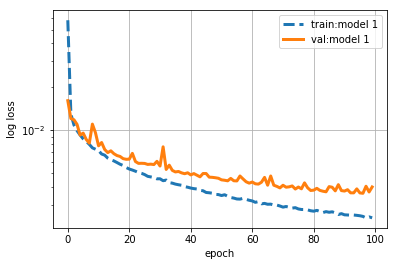

In [14]:
plot_loss(hist.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

### Test data evaluation and visualization


In [15]:
X_test , _ = load(test=True)
y_test = model.predict(X_test)

     index     0
0  ImageId  1783
1    Image  1783


The simple feedfoward network shows some descent performance. but sometimes landmarks are off the face

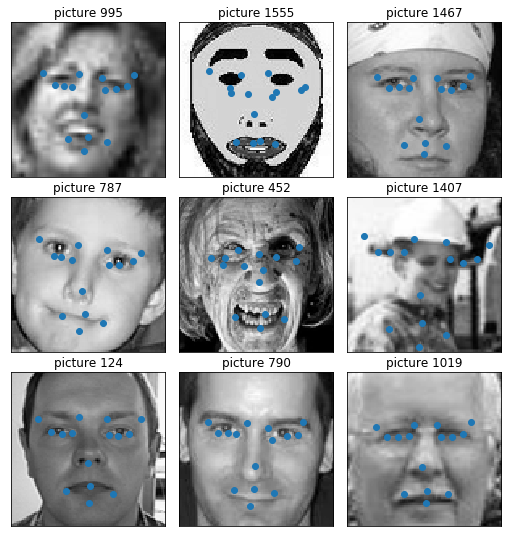

In [16]:
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X_test[ipic],y_test[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

Save model weights and architecture



In [0]:
from keras.models import model_from_json

def save_model(model,name):
    '''
    save model architecture and model weights
    '''
    json_string = model.to_json()
    open(name+'_architecture.json', 'w').write(json_string)
    model.save_weights(name+'_weights.h5')
    
def load_model(name):
    model = model_from_json(open(name+'_architecture.json').read())
    model.load_weights(name + '_weights.h5')
    return(model)

save_model(model,"model1")
model = load_model("model1")

Delete these data as we use differently structured data from now on

In [0]:
del X, y, X_test, y_test

## Covolutional neural network
Let's make our model more complicated. Loading training data. 

Notice that X is now 4-d numpy array (Nsample, Nrow, Ncol, 1).

In [19]:
## load data
X, y = load2d()
X.shape

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

(2140, 96, 96, 1)

## Define simple CNN funciton 

In [0]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout

def SimpleCNN(withDropout=False):
    '''
    WithDropout: If True, then dropout regularlization is added.
    This feature is experimented later.
    '''
    model = Sequential()
    model.add(Conv2D(32,(3, 3), input_shape = (96, 96, 1)))
    model.add(Activation('relu')) ## 96 - 3 + 2
    model.add(MaxPooling2D(pool_size = (2,2))) ## 96 - (3-1)*2
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Conv2D(64,(2,2)))
    model.add(Activation('relu')) ## 
    model.add(MaxPooling2D(pool_size = (2,2)))
    if withDropout:
        model.add(Dropout(0.1))
    
    model.add(Conv2D(128,(2,2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Flatten())
    
    model.add(Dense(500))
    model.add(Activation('relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(500))
    model.add(Activation('relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(30))
    sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
    model.compile(loss="mean_squared_error",optimizer=sgd)
    return(model)

In [21]:
%%time
model2 = SimpleCNN()

hist2 = model2.fit(X,y,nb_epoch=1000,validation_split=0.2,verbose=False)

W0707 08:32:12.568666 139784602924928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 8min 24s, sys: 2min 52s, total: 11min 16s
Wall time: 11min 41s


### plot validation loss, train loss

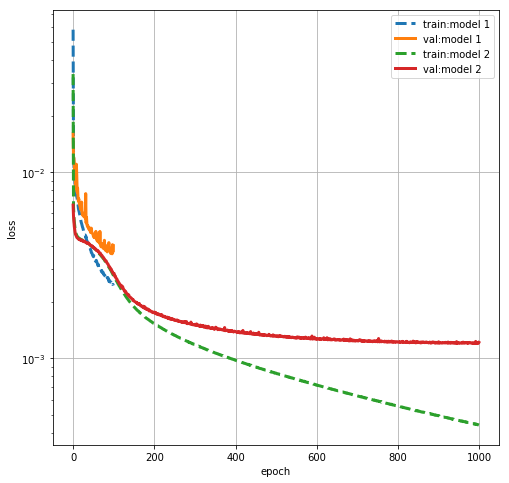

In [22]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2.history,"model 2",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [23]:
sample1,_ = load(test=True)
sample2,_ = load2d(test=True)
y_pred1 = model.predict(sample1)
y_pred2 = model2.predict(sample2)

     index     0
0  ImageId  1783
1    Image  1783
     index     0
0  ImageId  1783
1    Image  1783


### Compare the model performance fully connected layers vs simple CNN

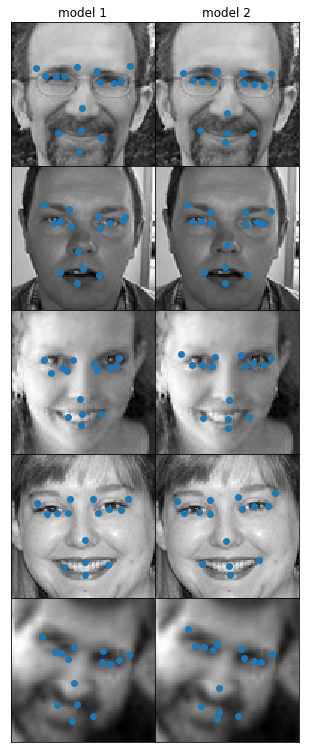

In [24]:
fig = plt.figure(figsize=(4, 10))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(sample2.shape[0])
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])        
    plot_sample(sample1[ipic],y_pred1[ipic],ax)
    if count < 3:
        ax.set_title("model 1")
        
    count += 1
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])  
    plot_sample(sample2[ipic],y_pred2[ipic],ax)
    if count < 3:
        ax.set_title("model 2")
    count += 1
plt.show()

## Data augmentation

### flipping pictures

In [0]:
class DataModifier(object):
    def fit(self,X_,y_):
        return(NotImplementedError)
    
class FlipPic(DataModifier):
    def __init__(self,flip_indices=None):
        if flip_indices is None:
            flip_indices = [
                (0, 2), (1, 3),
                (4, 8), (5, 9), (6, 10), (7, 11),
                (12, 16), (13, 17), (14, 18), (15, 19),
                (22, 24), (23, 25)
                ]
        
        self.flip_indices = flip_indices
        
    def fit(self,X_batch,y_batch):

        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, int(batch_size/2), replace=False)

        X_batch[indices] = X_batch[indices, :, ::-1,:]
        y_batch[indices, ::2] = y_batch[indices, ::2] * -1

        # flip left eye to right eye, left mouth to right mouth and so on .. 
        for a, b in self.flip_indices:
            y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
        return X_batch, y_batch

Manually splitting training and validation data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1712, 96, 96, 1)


Make sure that the pictures show up in both directions

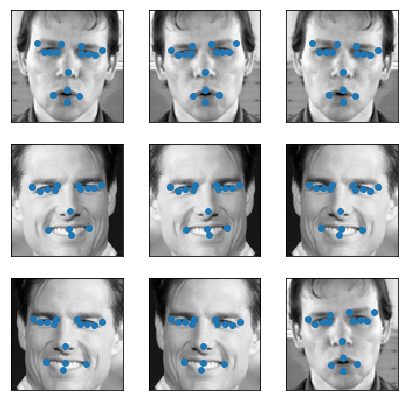

In [27]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator()
modifier = FlipPic()

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = modifier.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

### Training
As previously discussed, we manually write fit function. Our fit function allows "Early stopping", which means that the back propagration algorithm will terminate if the validation loss does not decrease for conseqtive epochs

In [0]:
def fit(model,modifier,train,validation,
        batch_size=32,epochs=2000,print_every=10,patience=np.Inf):
    '''
    model :        keras model object
    Modifier:      DataModifier() object
    train:         tuple containing two numpy arrays (X_train,y_train)
    validation:    tuple containing two numpy arrays (X_val,y_val)
    patience:      The back propagation algorithm will stop if the val_loss does not decrease 
                   after  epochs
    '''
    
    ## manually write fit method
    X_train,y_train = train
    X_val, y_val    = validation
    
    generator = ImageDataGenerator()
    
    history = {"loss":[],"val_loss":[]}
    for e in range(epochs):
        if e % print_every == 0:
            print('Epoch {:4}:'.format(e)), 
        ## -------- ##
        ## training
        ## -------- ##
        batches = 0
        loss_epoch = []
        for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=batch_size):
            X_batch, y_batch = modifier.fit(X_batch, y_batch)
            hist = model.fit(X_batch, y_batch,verbose=False,epochs=1)
            loss_epoch.extend(hist.history["loss"])
            batches += 1
            if batches >= len(X_train) / batch_size:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break   
        loss = np.mean(loss_epoch)
        history["loss"].append(loss)
        ## --------- ##
        ## validation
        ## --------- ##
        y_pred = model.predict(X_val)
        val_loss = np.mean((y_pred - y_val)**2)
        history["val_loss"].append(val_loss)
        if e % print_every == 0:
            print("loss - {:6.5f}, val_loss - {:6.5f}".format(loss,val_loss))
        min_val_loss = np.min(history["val_loss"])
        ## Early stopping
        if patience is not np.Inf:
            if np.all(min_val_loss < np.array(history["val_loss"])[-patience:]):
                break
    return(history)

In [29]:
%%time
#X, y = load2d()
model3 = SimpleCNN()
hist3 = fit(model3,modifier,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=2000,print_every=100
           )

Epoch    0:
loss - 0.03551, val_loss - 0.00712
Epoch  100:
loss - 0.00300, val_loss - 0.00288
Epoch  200:
loss - 0.00176, val_loss - 0.00175
Epoch  300:
loss - 0.00140, val_loss - 0.00149
Epoch  400:
loss - 0.00119, val_loss - 0.00136
Epoch  500:
loss - 0.00106, val_loss - 0.00128
Epoch  600:
loss - 0.00095, val_loss - 0.00122
Epoch  700:
loss - 0.00085, val_loss - 0.00118
Epoch  800:
loss - 0.00078, val_loss - 0.00115
Epoch  900:
loss - 0.00072, val_loss - 0.00112
Epoch 1000:
loss - 0.00066, val_loss - 0.00110
Epoch 1100:
loss - 0.00062, val_loss - 0.00108
Epoch 1200:
loss - 0.00057, val_loss - 0.00106
Epoch 1300:
loss - 0.00053, val_loss - 0.00105
Epoch 1400:
loss - 0.00050, val_loss - 0.00104
Epoch 1500:
loss - 0.00047, val_loss - 0.00104
Epoch 1600:
loss - 0.00044, val_loss - 0.00103
Epoch 1700:
loss - 0.00042, val_loss - 0.00103
Epoch 1800:
loss - 0.00039, val_loss - 0.00103
Epoch 1900:
loss - 0.00037, val_loss - 0.00103
CPU times: user 18min 30s, sys: 5min 39s, total: 24min 10s
W

## Plot the training and validation losses

Data augmentation with flipped pictures help improving the model prediction accuracy.

One potential issue: "train:model 3" (final value: 0.00038) is by far less than the "val:model 3" (final value: 0.00106), indicating that the model might have overfitted.

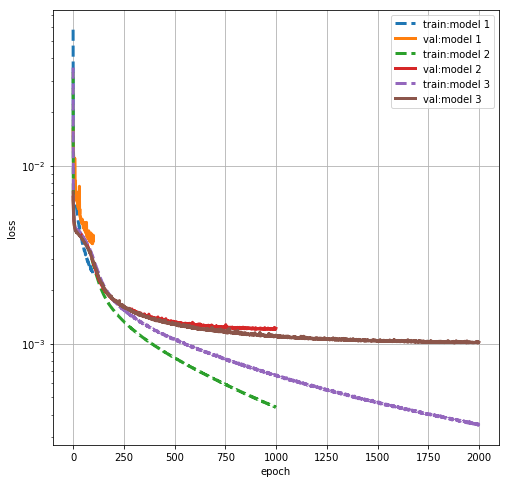

In [30]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2.history,"model 2",plt)
plot_loss(hist3,"model 3",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## data augmentation
### shifting pictures
Flipping pictures can double the number of pictures twice. If we allow the pictures to shift by some pixcels within frames, this can increase the number of pictures substantially! Here is my code to randomly shift the pictures to left, right, top, bottom by prespecified proportion.

In [0]:
class ShiftFlipPic(FlipPic):
    def __init__(self,flip_indices=None,prop=0.1):
        super(ShiftFlipPic,self).__init__(flip_indices)
        self.prop = prop
        
    def fit(self,X,y):
        X, y = super(ShiftFlipPic,self).fit(X,y)
        X, y = self.shift_image(X,y,prop=self.prop)
        return(X,y)
    def random_shift(self,shift_range,n=96):
        '''
        :param shift_range: 
        The maximum number of columns/rows to shift
        :return: 
        keep(0):   minimum row/column index to keep
        keep(1):   maximum row/column index to keep
        assign(0): minimum row/column index to assign
        assign(1): maximum row/column index to assign
        shift:     amount to shift the landmark

        assign(1) - assign(0) == keep(1) - keep(0)
        '''
        shift = np.random.randint(-shift_range,
                                  shift_range)
        def shift_left(n,shift):
            shift = np.abs(shift)
            return(0,n - shift)
        def shift_right(n,shift):
            shift = np.abs(shift)
            return(shift,n)

        if shift < 0:
            keep = shift_left(n,shift) 
            assign = shift_right(n,shift)
        else:
            assign = shift_left(n,shift) ## less than 96
            keep = shift_right(n,shift)

        return((keep,  assign, shift))

    def shift_single_image(self,x_,y_,prop=0.1):
        '''
        :param x_: a single picture array (96, 96, 1)
        :param y_: 15 landmark locations 
                   [0::2] contains x axis values
                   [1::2] contains y axis values 
        :param prop: proportion of random horizontal and vertical shift
                     relative to the number of columns
                     e.g. prop = 0.1 then the picture is moved at least by 
                     0.1*96 = 8 columns/rows
        :return: 
        x_, y_
        '''
        w_shift_max = int(x_.shape[0] * prop)
        h_shift_max = int(x_.shape[1] * prop)

        w_keep,w_assign,w_shift = self.random_shift(w_shift_max)
        h_keep,h_assign,h_shift = self.random_shift(h_shift_max)

        x_[w_assign[0]:w_assign[1],
           h_assign[0]:h_assign[1],:] = x_[w_keep[0]:w_keep[1],
                                           h_keep[0]:h_keep[1],:]

        y_[0::2] = y_[0::2] - h_shift/float(x_.shape[0]/2.)
        y_[1::2] = y_[1::2] - w_shift/float(x_.shape[1]/2.)
        return(x_,y_)

    def shift_image(self,X,y,prop=0.1):
            ## This function may be modified to be more efficient e.g. get rid of loop?
            for irow in range(X.shape[0]):
                x_ = X[irow]
                y_ = y[irow]
                X[irow],y[irow] = self.shift_single_image(x_,y_,prop=prop)
            return(X,y)

Following codes plot the generated pictures.



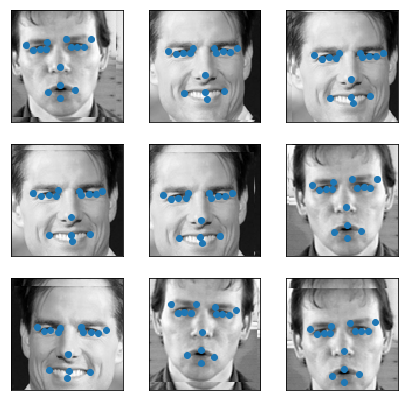

In [32]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator()
shiftFlipPic = ShiftFlipPic(prop=0.1)

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = shiftFlipPic.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

Observations

The landmarks are shiftting together with the picture frame.
Notice that if you shift the pictures too much, then the landmarks go outside of the frame. (For now we are going to ignore this potential problem.)

## Training

In [33]:
%%time
model4 = SimpleCNN()
hist4 = fit(model4,shiftFlipPic,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=3000,print_every=50,patience=100)

Epoch    0:
loss - 0.04533, val_loss - 0.00723
Epoch   50:
loss - 0.00472, val_loss - 0.00310
Epoch  100:
loss - 0.00334, val_loss - 0.00227
Epoch  150:
loss - 0.00287, val_loss - 0.00193
Epoch  200:
loss - 0.00269, val_loss - 0.00182
Epoch  250:
loss - 0.00240, val_loss - 0.00169
Epoch  300:
loss - 0.00220, val_loss - 0.00159
Epoch  350:
loss - 0.00209, val_loss - 0.00152
Epoch  400:
loss - 0.00197, val_loss - 0.00148
Epoch  450:
loss - 0.00192, val_loss - 0.00142
Epoch  500:
loss - 0.00180, val_loss - 0.00138
Epoch  550:
loss - 0.00173, val_loss - 0.00134
Epoch  600:
loss - 0.00168, val_loss - 0.00130
Epoch  650:
loss - 0.00164, val_loss - 0.00127
Epoch  700:
loss - 0.00155, val_loss - 0.00125
Epoch  750:
loss - 0.00152, val_loss - 0.00123
Epoch  800:
loss - 0.00147, val_loss - 0.00119
Epoch  850:
loss - 0.00144, val_loss - 0.00118
Epoch  900:
loss - 0.00144, val_loss - 0.00115
Epoch  950:
loss - 0.00141, val_loss - 0.00116
Epoch 1000:
loss - 0.00135, val_loss - 0.00112
Epoch 1050:
l

### Plot the training and validation losses

Data augmentation with flipped + shifted pictures help improving the model prediction accuracy. The val_loss is below 0.001

Model 3 had overfitting issue when the number of epoch was 2000 ("train:model 3" << "val:model 3"). Model 4 seems to have an opposite situation, underfitting, at epoch = 2000 as ("train:model 4" > "val:model 4"). As "val: model4" seems still decreasing at epoch = 2000, we increase the number of epoch to 3000. By epoch = 3000 "train:model 4" ~= "val:model 4". In practice, it is better to stop the training when training loss is slightly less than the validation, but I stop training here.

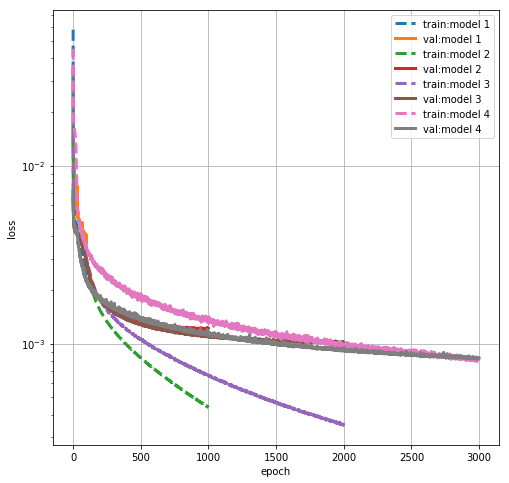

In [34]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2.history,"model 2",plt)
plot_loss(hist3,"model 3",plt)
plot_loss(hist4,"model 4",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Save the model object as model 4 seems to be the best so far

In [0]:
save_model(model4,"model4")


# More complex model

For another experiment with adding Dropout regulaziation layer. You can do this by setting model5 = SimpleCNN(True). As the data augmentation with the random shifting already served the purpose of raguralization, I did not see much improvement by adding Dropout layer.


## Create separate models for different landmarks separately.
Up to this point, we are only using about 20% (X.shape[0] = 2140) of the original data. This is quite a waste as for some landmarks (e.g., left_eye_center, right_eye_center), more than 7000 frames are available. If I separately create model for separate set of landmarks, I can use more data for training.

This motivated Danile Nouri to create seprate models. I follow this blog and create 6 separate models. The 15 landmarks are devided into 6 separate groups as shown in the list "SPECIALIST_SETTINGS" below. All 6 models contains the same CNN architecture but the final output layer is adjusted for different number of outputs: for example we have a model for left eye and right eye center landmark prediction. As there are are x and y coordinates for both eye centers, we have 4 nodes in the output layer of this model.

Remind you that it took me 38 minutes to train Model 4 with epochs = 3000. If I train all 6 models from a scratch, it could take about 4 hours (38 minutes x 6). Instead, I will take advantage of the knowledge (i.e., weights) from model 4. We will use the weights from model 4 and only train the weights from the final output layer. This is the idea of transfer learning.

About 1000 epochs would be enough to train the weights from the final output layers. However, we will just train 500 epochs due to the lack of time.

In [0]:
SPECIALIST_SETTINGS = [
    dict(
        columns=(
            'left_eye_center_x', 'left_eye_center_y',
            'right_eye_center_x', 'right_eye_center_y',
            ),
        flip_indices=((0, 2), (1, 3)),
        ),

    dict(
        columns=(
            'nose_tip_x', 'nose_tip_y',
            ),
        flip_indices=(),
        ),

    dict(
        columns=(
            'mouth_left_corner_x', 'mouth_left_corner_y',
            'mouth_right_corner_x', 'mouth_right_corner_y',
            'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
            ),
        flip_indices=((0, 2), (1, 3)),
        ),

    dict(
        columns=(
            'mouth_center_bottom_lip_x',
            'mouth_center_bottom_lip_y',
            ),
        flip_indices=(),
        ),

    dict(
        columns=(
            'left_eye_inner_corner_x', 'left_eye_inner_corner_y',
            'right_eye_inner_corner_x', 'right_eye_inner_corner_y',
            'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
            'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
            ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
        ),

    dict(
        columns=(
            'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y',
            'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y',
            'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
            'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
            ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
        ),
    ]

from collections import OrderedDict

def fit_specialists(freeze=True,
                    print_every=50,
                    epochs=3000,
                    prop=0.1,
                    name_transfer_model="model4"):
    specialists = OrderedDict()
 

    for setting in SPECIALIST_SETTINGS:
        
        cols = setting['columns']
        flip_indices = setting['flip_indices']
        
        X, y = load2d(cols=cols)
        X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                          test_size=0.2, 
                                                          random_state=42)
        model = load_model(name_transfer_model) 
        if freeze:
            for layer in model.layers:
                layer.trainable = False
            
        model.layers.pop() # get rid of output layer
        model.outputs = [model.layers[-1].output]
        model.layers[-1].outbound_nodes = []
        model.add(Dense(len(cols))) # add new output layer

        model.compile(loss='mean_squared_error', optimizer="adam")
        
        shiftFlipPic = ShiftFlipPic(flip_indices=flip_indices,
                                    prop=prop)
        
        ## print(model.summary())
        hist = fit(model,shiftFlipPic,
                    train=(X_train,y_train),
                    validation=(X_val,y_val),
                    batch_size=32,epochs=epochs,
                    print_every=print_every) 
        
       
        specialists[cols] = {"model":model,
                             "hist":hist}
    return(specialists)

   
Set freeze = True for training the weights only from the final outputlayers. If freeze = False then the weights from the transfer model are used only for the initialization of the model and all the weights are re-trained.
   
epochs = 500 seems to be enough (checked by looking at the plot of val_loss vs epochs)
  
use model4 as the transfer model




In [37]:
%%time
specialists1 = fit_specialists(freeze=True,
                    print_every=50,
                    epochs=500,
                    name_transfer_model="model4")

                index     0
0   left_eye_center_x  7039
1   left_eye_center_y  7039
2  right_eye_center_x  7036
3  right_eye_center_y  7036
4               Image  7049
Epoch    0:
loss - 0.24055, val_loss - 0.01287
Epoch   50:
loss - 0.00272, val_loss - 0.00342
Epoch  100:
loss - 0.00267, val_loss - 0.00335
Epoch  150:
loss - 0.00287, val_loss - 0.00340
Epoch  200:
loss - 0.00271, val_loss - 0.00337
Epoch  250:
loss - 0.00280, val_loss - 0.00340
Epoch  300:
loss - 0.00269, val_loss - 0.00331
Epoch  350:
loss - 0.00268, val_loss - 0.00339
Epoch  400:
loss - 0.00262, val_loss - 0.00338
Epoch  450:
loss - 0.00257, val_loss - 0.00337
        index     0
0  nose_tip_x  7049
1  nose_tip_y  7049
2       Image  7049
Epoch    0:
loss - 0.04842, val_loss - 0.01258
Epoch   50:
loss - 0.00647, val_loss - 0.00522
Epoch  100:
loss - 0.00633, val_loss - 0.00527
Epoch  150:
loss - 0.00612, val_loss - 0.00484
Epoch  200:
loss - 0.00607, val_loss - 0.00487
Epoch  250:
loss - 0.00608, val_loss - 0.00485


### plot validation losses of each specialist model

You might think that the model performance is relatively poor especially for the nose tip models, and month center models, because their losses are above 0.03. However, you should not compare these validation losses with the validation losses from model 4, because the data size has increased almost 4 times for these data.

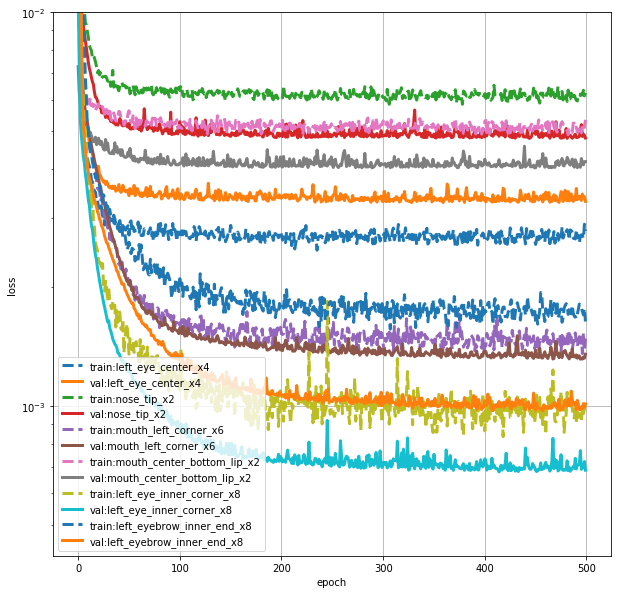

In [38]:
def plot_specialist(specialists1,plt):
    
    i = 1
    for key , value in specialists1.items():
        plot_loss(value["hist"],key[0] + str(len(key)),plt)
        i += 1

    plt.legend()
    plt.grid()
    plt.set_yscale("log")
    plt.set_xlabel("epoch")
    plt.set_ylabel("loss")
  
fig = plt.figure(figsize=(10,10))  
ax = fig.add_subplot(1,1,1)
ax.set_ylim(7**(-4),10**(-2))
plot_specialist(specialists1,ax)
plt.show()